In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


import tensorflow as tf
from  tensorflow.keras.models import Model
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']= False

In [10]:
from google.colab import files
uploaded = files.upload()


Saving ECG5000_TEST.arff to ECG5000_TEST.arff
Saving ECG5000_TEST.ts to ECG5000_TEST.ts
Saving ECG5000_TEST.txt to ECG5000_TEST.txt
Saving ECG5000_TRAIN.arff to ECG5000_TRAIN.arff
Saving ECG5000_TRAIN.ts to ECG5000_TRAIN.ts
Saving ECG5000_TRAIN.txt to ECG5000_TRAIN.txt
Saving ECG5000.txt to ECG5000.txt


In [11]:
#Saving files in colab
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
!ls -alrt

total 26436
drwxr-xr-x 4 root root     4096 Feb 14 14:27 .config
drwxr-xr-x 1 root root     4096 Feb 14 14:28 sample_data
drwxr-xr-x 1 root root     4096 Feb 20 09:07 ..
drwx------ 5 root root     4096 Feb 20 09:14 drive
-rw-r--r-- 1 root root        0 Feb 20 09:14 ecg_final.txt
-rw-r--r-- 1 root root  7086857 Feb 20 09:20 ECG5000_TEST.arff
-rw-r--r-- 1 root root  7083409 Feb 20 09:20 ECG5000_TEST.ts
-rw-r--r-- 1 root root 10156500 Feb 20 09:20 ECG5000_TEST.txt
-rw-r--r-- 1 root root   790229 Feb 20 09:20 ECG5000_TRAIN.arff
-rw-r--r-- 1 root root   786781 Feb 20 09:20 ECG5000_TRAIN.ts
-rw-r--r-- 1 root root  1128500 Feb 20 09:20 ECG5000_TRAIN.txt
drwxr-xr-x 1 root root     4096 Feb 20 09:20 .
-rw-r--r-- 1 root root       38 Feb 20 09:20 ECG5000.txt


In [28]:
!cat ECG5000_TRAIN.txt  ECG5000_TEST.txt > ecg_final.txt


In [29]:
!head ecg_final.txt

   1.0000000e+00  -1.1252183e-01  -2.8272038e+00  -3.7738969e+00  -4.3497511e+00  -4.3760410e+00  -3.4749863e+00  -2.1814082e+00  -1.8182865e+00  -1.2505219e+00  -4.7749208e-01  -3.6380791e-01  -4.9195659e-01  -4.2185509e-01  -3.0920086e-01  -4.9593870e-01  -3.4211867e-01  -3.5533627e-01  -3.6791303e-01  -3.1650279e-01  -4.1237405e-01  -4.7167181e-01  -4.1345783e-01  -3.6461703e-01  -4.4929829e-01  -4.7141866e-01  -4.2477658e-01  -4.6251673e-01  -5.5247236e-01  -4.7537519e-01  -6.9420000e-01  -7.0186810e-01  -5.9381178e-01  -6.6068415e-01  -7.1383066e-01  -7.6980688e-01  -6.7228161e-01  -6.5367605e-01  -6.3940562e-01  -5.5930228e-01  -5.9167032e-01  -4.9322332e-01  -4.6305183e-01  -3.0164382e-01  -2.3273401e-01  -1.2505488e-01  -1.5394314e-01  -2.4357404e-02  -6.5608758e-02   3.4999258e-02   6.1935219e-02   7.1195420e-02   1.2392505e-01   1.0312371e-01   2.2522849e-01   1.2868305e-01   3.0248315e-01   2.5727621e-01   1.9635161e-01   1.7938297e-01   2.4472863e-01   3.4121687e-01   3.282

#Data preparation activity

In [30]:
df=pd.read_csv('ecg_final.txt' ,sep='  ',header=None)

<ipython-input-30-510849398bd9>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv('ecg_final.txt' ,sep='  ',header=None)


In [31]:
df

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4.0,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,...,0.205543,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334
4996,2.0,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,...,1.218185,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932
4997,2.0,-1.351779,-2.209006,-2.520225,-3.061475,-3.065141,-3.030739,-2.622720,-2.044092,-1.295874,...,-0.896575,-1.512234,-2.076075,-2.586042,-3.322799,-3.627311,-3.437038,-2.260023,-1.577823,-0.684531
4998,2.0,-1.124432,-1.905039,-2.192707,-2.904320,-2.900722,-2.761252,-2.569705,-2.043893,-1.490538,...,-2.495989,-2.821782,-3.268355,-3.634981,-3.168765,-2.245878,-1.262260,-0.443307,-0.559769,0.108568


In [32]:
df.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
           dtype='int64', length=141)

In [33]:
df=df.add_prefix('c')

In [34]:
df.columns

Index(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
       ...
       'c131', 'c132', 'c133', 'c134', 'c135', 'c136', 'c137', 'c138', 'c139',
       'c140'],
      dtype='object', length=141)

In [35]:
df['c0'].value_counts()

#1 is normall

1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: c0, dtype: int64

In [36]:
df.describe()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.527400,-0.262476,-1.649511,-2.492211,-3.119443,-3.167438,-2.866308,-2.273126,-1.798127,-1.410124,...,0.146319,0.070973,-0.062914,-0.276206,-0.507667,-0.761043,-0.834741,-0.642263,-0.487242,-0.706008
std,0.760372,1.152369,1.445493,1.386409,1.302802,1.104382,0.906133,0.731627,0.623100,0.637149,...,1.171299,1.404842,1.646585,1.895134,2.059758,2.086218,2.056220,1.859296,1.830987,1.414465
min,1.000000,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,...,-3.971715,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227
25%,1.000000,-1.004511,-2.701576,-3.668096,-4.227247,-4.007470,-3.480479,-2.779941,-2.165851,-1.774124,...,-0.655753,-1.089300,-1.588885,-2.147449,-2.731550,-3.030509,-2.868331,-2.153513,-1.657771,-1.596692
50%,1.000000,-0.297541,-1.661892,-2.585677,-3.387934,-3.468718,-2.947061,-2.285578,-1.750157,-1.422570,...,0.473642,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.565588
75%,2.000000,0.500061,-0.677290,-1.513964,-2.235369,-2.530967,-2.398813,-1.823494,-1.484923,-1.063708,...,1.062134,1.169420,1.238687,1.264471,1.234433,1.034584,0.945237,0.951681,1.002692,0.272012
max,5.000000,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,...,2.960969,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103


#Spliting and Training Dataset

In [38]:
train_data , test_data ,train_labels , test_labels = train_test_split(df.values , df.values[ :,0:1], test_size=0.2 , random_state=111)

In [39]:
scaler=MinMaxScaler()
data_scaled=scaler.fit(train_data)

In [40]:
train_data_scaled=data_scaled.transform(train_data)
test_data_scaled=data_scaled.transform(test_data)

In [41]:
train_data_scaled

array([[0.        , 0.50002524, 0.42299659, ..., 0.61680162, 0.58388556,
        0.3649298 ],
       [0.        , 0.48602565, 0.31200637, ..., 0.60438613, 0.6676527 ,
        0.40538671],
       [0.        , 0.6760041 , 0.6161329 , ..., 0.73484988, 0.64562905,
        0.43438114],
       ...,
       [0.25      , 0.70698484, 0.7982501 , ..., 0.23053824, 0.31421167,
        0.37774737],
       [0.        , 0.46498254, 0.25827775, ..., 0.6340938 , 0.66453824,
        0.47717869],
       [0.25      , 0.69314707, 0.79831145, ..., 0.68561341, 0.61110713,
        0.53512758]])

In [76]:
normal_train_data=pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
anomaly_train_data=pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 >0').values[:,1:]

In [75]:
normal_test_data=pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
anomaly_test_data=pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 >0').values[:,1:]

In [77]:
print(normal_train_data.shape)
print(normal_test_data.shape)

(2356, 140)
(563, 140)


In [78]:
print(anomaly_train_data.shape)
print(anomaly_test_data.shape)

(1644, 140)
(437, 140)


#Plotting

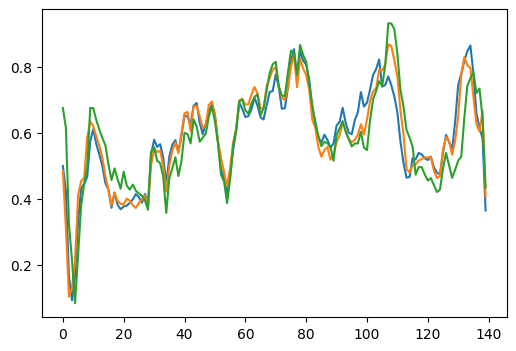

In [79]:
plt.figure(figsize=(6, 4))  # Adjusting the width and height of plot

plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])


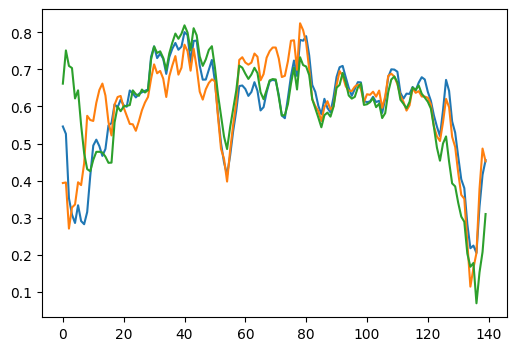

In [80]:
plt.figure(figsize=(6, 4))  # Adjusting the width and height of plot

plt.plot(anomaly_train_data[0])
plt.plot(anomaly_train_data[1])
plt.plot(anomaly_train_data[2])

#Creating Our Model




In [81]:
import tensorflow as tf
model= tf.keras.Sequential()

model.add(tf.keras.layers.Dense(64 , activation ="relu"))
model.add(tf.keras.layers.Dense(32 , activation ="relu"))
model.add(tf.keras.layers.Dense(16 , activation ="relu"))
model.add(tf.keras.layers.Dense(8 , activation ="relu"))
model.add(tf.keras.layers.Dense(16 , activation ="relu"))
model.add(tf.keras.layers.Dense(32 , activation ="relu"))
model.add(tf.keras.layers.Dense(64 , activation ="relu"))

model.add(tf.keras.layers.Dense(140, activation ="sigmoid"))

Subclasses

In [86]:
import tensorflow as tf

class AutoEncoder(tf.keras.Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation="relu"),
            tf.keras.layers.Dense(32, activation="relu"),
            tf.keras.layers.Dense(16, activation="relu"),
            tf.keras.layers.Dense(8, activation="relu")
        ])

        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(16, activation="relu"),
            tf.keras.layers.Dense(32, activation="relu"),
            tf.keras.layers.Dense(64, activation="relu"),
            tf.keras.layers.Dense(140, activation="sigmoid")
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded




#Defining Model

In [87]:
# Creating an instance of the AutoEncoder model
model = AutoEncoder()

# Defining early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    mode='min'
)

# Compiling the model
model.compile(optimizer='adam', loss='mae')



Fitting the model with our data

In [88]:
# Training the model
history = model.fit(
    normal_train_data,
    normal_train_data,
    epochs=50,
    batch_size=128,
    validation_data=(train_data_scaled[:,1:], train_data_scaled[:,1:]),
    shuffle=True,
    callbacks=[early_stopping]
)



Epoch 1/50
19/19 [==============================] - 2s 15ms/step - loss: 0.1243 - val_loss: 0.1028
Epoch 2/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0721 - val_loss: 0.0805
Epoch 3/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0512 - val_loss: 0.0773
Epoch 4/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0483 - val_loss: 0.0762
Epoch 5/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0480 - val_loss: 0.0760
Epoch 6/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0478 - val_loss: 0.0758
Epoch 7/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0477 - val_loss: 0.0753
Epoch 8/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0476 - val_loss: 0.0745
Epoch 9/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0475 - val_loss: 0.0739
Epoch 10/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0472 - val_loss: 0.0730
Epoch 11/50
19/19 

In [89]:
encoder_out=model.encoder(normal_test_data).numpy()
decoder_out=model.decoder(encoder_out).numpy()

In [91]:
encoder_out.shape

(563, 8)

In [92]:
decoder_out.shape

(563, 140)

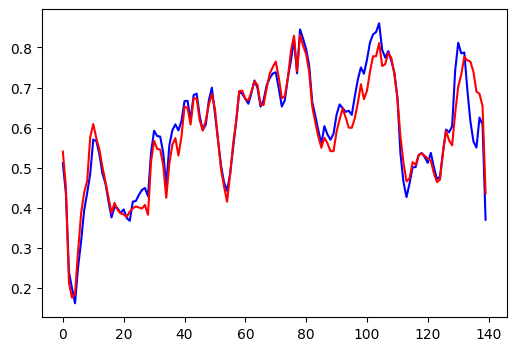

In [94]:
plt.figure(figsize=(6, 4))  # Adjusting the width and height of plot

plt.plot(normal_test_data[0],'b')
plt.plot(decoder_out[0],'r')

#we have reconstruction error, comparing two blue(our normal data) and red plot(decoder data)

In [96]:
encoder_out_a = model.encoder(anomaly_test_data).numpy()
decoder_out_a = model.decoder(encoder_out_a ).numpy()

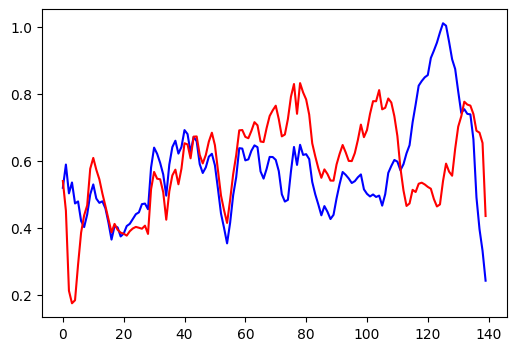

In [97]:
plt.figure(figsize=(6, 4))  # Adjusting the width and height of plot

plt.plot(anomaly_test_data[0],'b')
plt.plot(decoder_out[0],'r')

#blue plot(anomaly data), red plot(decoded data)
#reconstruction error is high

#Defining Loss Threshold

18/18 [==============================] - 0s 2ms/step


(array([ 7., 15., 28., 44., 41., 37., 34., 40., 36., 36., 28., 15., 25.,
        19., 22., 15., 11., 10., 10.,  9., 10.,  9.,  4.,  6.,  6.,  6.,
         7.,  9.,  2.,  1.,  3.,  1.,  1.,  1.,  3.,  1.,  0.,  0.,  3.,
         0.,  2.,  2.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.]),
 array([0.01451873, 0.01635353, 0.01818833, 0.02002313, 0.02185792,
        0.02369272, 0.02552752, 0.02736232, 0.02919712, 0.03103192,
        0.03286671, 0.03470151, 0.03653631, 0.03837111, 0.04020591,
        0.0420407 , 0.0438755 , 0.0457103 , 0.0475451 , 0.0493799 ,
        0.0512147 , 0.05304949, 0.05488429, 0.05671909, 0.05855389,
        0.06038869, 0.06222349, 0.06405828, 0.06589308, 0.06772788,
        0.06956268, 0.07139748, 0.07323227, 0.07506707, 0.07690187,
        0.07873667, 0.08057147, 0.08240627, 0.08424106, 0.08607586,
        0.08791066, 0.08974546, 0.09158026, 0.09341506, 0.09524985,
        0.09708465, 0.09891945, 0.10075425, 0.10258905, 0.10442384,
        0.10625864]),
 <BarContainer

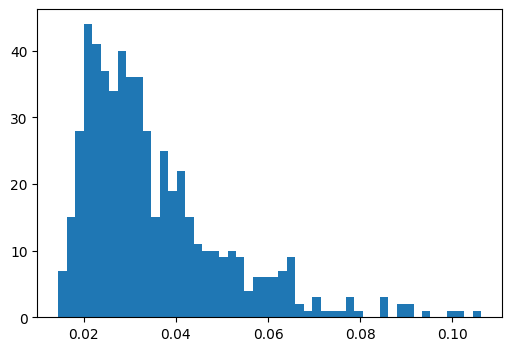

In [99]:
reconstructions= model.predict(normal_test_data)
train_loss = tf.keras.losses.mae(reconstructions , normal_test_data)


plt.figure(figsize=(6, 4))
plt.hist(train_loss , bins=50)

In [100]:
np.mean(train_loss)

0.03520539028193488

In [101]:
np.std(train_loss)

0.015488917475586148

In [102]:
threshold = np.mean(train_loss) + 2*np.std(train_loss)

In [103]:
threshold

0.06618322523310718

14/14 [==============================] - 0s 2ms/step


(array([ 1.,  0.,  0.,  1.,  0.,  0.,  2.,  4.,  0.,  1.,  4.,  9., 15.,
        29., 23., 41., 44., 49., 47., 33., 42., 30., 19., 10.,  3., 10.,
         3.,  0.,  4.,  0.,  2.,  2.,  1.,  0.,  2.,  1.,  1.,  0.,  0.,
         2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.04657374, 0.04949269, 0.05241164, 0.05533059, 0.05824955,
        0.0611685 , 0.06408745, 0.0670064 , 0.06992535, 0.0728443 ,
        0.07576325, 0.0786822 , 0.08160115, 0.0845201 , 0.08743905,
        0.09035801, 0.09327696, 0.09619591, 0.09911486, 0.10203381,
        0.10495276, 0.10787171, 0.11079066, 0.11370961, 0.11662856,
        0.11954751, 0.12246646, 0.12538542, 0.12830437, 0.13122332,
        0.13414227, 0.13706122, 0.13998017, 0.14289912, 0.14581807,
        0.14873702, 0.15165597, 0.15457492, 0.15749387, 0.16041283,
        0.16333178, 0.16625073, 0.16916968, 0.17208863, 0.17500758,
        0.17792653, 0.18084548, 0.18376443, 0.18668338, 0.18960233,
        0.19252129]),
 <BarContainer

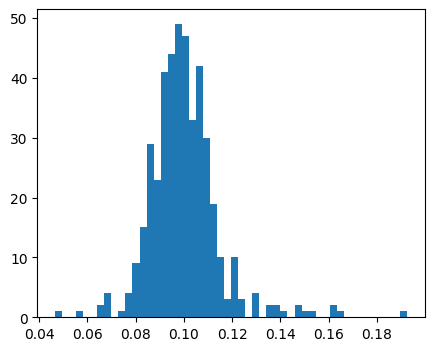

In [111]:
reconstructions_a = model.predict(anomaly_test_data)
train_loss_a = tf.keras.losses.mae(reconstructions_a , anomaly_test_data)


plt.figure(figsize=(5, 4))
plt.hist(train_loss_a , bins=50)

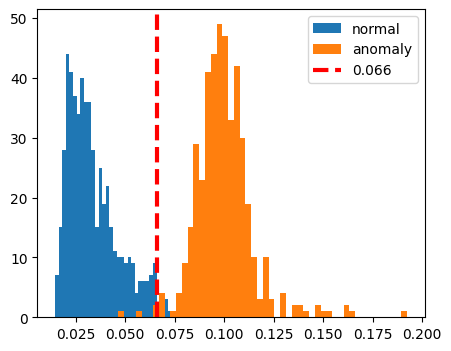

In [112]:
plt.figure(figsize=(5, 4))


plt.hist(train_loss, bins=50 , label='normal')
plt.hist(train_loss_a , bins=50 , label='anomaly')
plt.axvline(threshold , color='r', linewidth=3 , linestyle='dashed' , label='{:0.3f}'.format(threshold))
plt.legend(loc='upper right')
plt.show()

In [107]:
np.mean(train_loss_a)

0.10001117337062324

In [108]:
np.std(train_loss_a)

0.014528843575050512

In [114]:
tf.math.less( train_loss , threshold)

<tf.Tensor: shape=(563,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  Tr

In [116]:
preds= tf.math.less( train_loss , threshold)

In [121]:
tf.math.count_nonzero(preds)

<tf.Tensor: shape=(), dtype=int64, numpy=539>

In [122]:
preds.shape

TensorShape([563])

In [123]:
preds_a = tf.math.greater( train_loss_a , threshold)

In [124]:
tf.math.count_nonzero(preds_a)

<tf.Tensor: shape=(), dtype=int64, numpy=433>

In [125]:
preds_a.shape

TensorShape([437])

This model predicted anomalies almost more than 98%  